# Configuración Inicial

In [ ]:
!pip install xlrd

In [1]:
import pandas as pd
import os
import pandas as pd
#import sqlalchemy
import numpy as np

from utils import *

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data_path = os.getcwd() + "//Datos" #Definir ruta de búsqueda
df1= pd.read_excel(data_path + "//Datos 2014.xls", skiprows=1, engine='xlrd')
df2 = pd.read_excel(data_path + "//Datos 2018.xls", skiprows=1, engine='xlrd')
df3 = pd.read_excel(data_path + "//Datos 2022.xls", skiprows=1, engine='xlrd')
        
#check_data(df1, df2, df3)

In [ ]:
'IADM140 (M$) Impuesto Territorial de Beneficio Municipal (Art. 37 DL 3063) ' == 'IADM140 (M$) Impuesto Territorial de Beneficio Municipal (Art. 37 DL 3063) '

In [4]:
columns = [val for val in mapper_3.values()] #Crear lista con nombres a utilizar en el dataframe
df = pd.DataFrame(columns=columns)   #Crea dataframe vacío con líneas definidas antes

for i, item in enumerate(zip([df1,df2,df3], [2014,2018,2022])):
    year = item[1]
    try:
        item[0].drop(0, inplace=True)
    except:
        None
        
    item[0].loc[:,"Año"] = year
    item[0].rename(mapper=mapper_3, axis=1, inplace=True) #Unir archivos
    
    df = pd.concat([df, item[0]])
    df.reset_index(drop=True, inplace=True)  
#Cambio formato
df["Codigo"] = df["Codigo"].astype(str).str.zfill(5)
df["Codigo Region"] = df["Codigo"].str[:2]
df["Codigo Provincia"] = df["Codigo"].str[:3]
df["Region"] = df["Codigo Region"].replace(to_replace=region_dict)
#Transformación a dato numérico
for col in df.columns:
    if col[:3] == "IAD" or col[:3] == "BGM":
        df[col] = pd.to_numeric(df[col], downcast="float", errors="coerce")

#df.head()

Codigo      Municipio     IDA IDAxCDyPC  IDAxIT       IT     IFCM        IP  \
0  01101        IQUIQUE  959868    323144  636724  5238434  2557901  28586628   
1  01107  ALTO HOSPICIO   78971     52012   26959   311312  5394496   8499813   
2  01401   POZO ALMONTE    5622      4072    1550   193277  1318549   5131626   
3  01402         CAMIÑA     256       256       0       93  1161606   1260978   
4  01403       COLCHANE    1020       127     893      723   872903   1006047   

        IPP        GC  ...     GJC  GJDM      GJ   GST      GS     TFCM  \
0  26028727  37279890  ...  979026     0  979026     0  138833  2557901   
1   3105317   9168130  ...  441932  5172  447104     0       0  5394496   
2   3813077   5079596  ...       0     0       0  3257       0  1309226   
3     99372   1139783  ...    3879     0    3879     0       0  1161606   
4    133144   1186399  ...   15654     0   15654     0       0   872903   

      Año Codigo Region Codigo Provincia    Region  
0  2014.0            01              011  Tarapacá  
1  2014.0            01              011  Tarapacá  
2  2014.0            01              014  Tarapacá  
3  2014.0            01              014  Tarapacá  
4  2014.0            01              014  Tarapacá  

[5 rows x 32 columns]

In [5]:
for col in ['IDA', 'IDAxCDyPC', 'IDAxIT', 'IT', 'IFCM', 'IP',
       'IPP', 'GC', 'GBySC', 'GT', 'GSC', 'GFCM', 'GP', 'CA', 'CASC', 'CE',
       'CESC', 'DAyV', 'DAC', 'GAP', 'GJC', 'GJDM', 'GJ', 'GST', 'GS', 'TFCM']:
    df[col] = pd.to_numeric(df[col], downcast="float", errors="coerce")

#df.head()

Codigo      Municipio       IDA  IDAxCDyPC    IDAxIT         IT       IFCM  \
0  01101        IQUIQUE  959868.0   323144.0  636724.0  5238434.0  2557901.0   
1  01107  ALTO HOSPICIO   78971.0    52012.0   26959.0   311312.0  5394496.0   
2  01401   POZO ALMONTE    5622.0     4072.0    1550.0   193277.0  1318549.0   
3  01402         CAMIÑA     256.0      256.0       0.0       93.0  1161606.0   
4  01403       COLCHANE    1020.0      127.0     893.0      723.0   872903.0   

           IP         IPP          GC  ...       GJC    GJDM        GJ  \
0  28586628.0  26028727.0  37279890.0  ...  979026.0     0.0  979026.0   
1   8499813.0   3105317.0   9168130.0  ...  441932.0  5172.0  447104.0   
2   5131626.0   3813077.0   5079596.0  ...       0.0     0.0       0.0   
3   1260978.0     99372.0   1139783.0  ...    3879.0     0.0    3879.0   
4   1006047.0    133144.0   1186399.0  ...   15654.0     0.0   15654.0   

      GST        GS       TFCM     Año  Codigo Region  Codigo Provincia  \
0     0.0  138833.0  2557901.0  2014.0             01               011   
1     0.0       0.0  5394496.0  2014.0             01               011   
2  3257.0       0.0  1309226.0  2014.0             01               014   
3     0.0       0.0  1161606.0  2014.0             01               014   
4     0.0       0.0   872903.0  2014.0             01               014   

     Region  
0  Tarapacá  
1  Tarapacá  
2  Tarapacá  
3  Tarapacá  
4  Tarapacá  

[5 rows x 32 columns]

In [6]:
#Definición de variables
df["Gasto asociado a IT"] = df['CASC'] + df['CESC'] + df['GAP']+ df['GJC']
df["%IT_en_IPP"] = 100.0*df['IT']/df['IPP']
df["%IT_en_GC"] = 100.0*df['IT']/df['GC']
df["%IT_en_GT"] = 100.0*df['IT']/df['GT']
df["%IT_ en_Gasto asociado a IT"] = 100.0*df['IT']/df['Gasto asociado a IT']
df["DDAA"] = df["IDA"] + df["IDAxIT"]+ df["IDAxCDyPC"]
df["GDA"]= df["DAyV"] + df["DAC"]
df["%DA_en_IPP"] = 100.0*df["DDAA"]/df['IPP']
df["balance_DDAA"] = df["DDAA"] - df["GDA"]
#df

In [7]:
fields_Region = ["Año", "Region","%IT_en_IPP","Gasto asociado a IT","%IT_en_GC","%IT_en_GT","%IT_ en_Gasto asociado a IT",
          "DDAA","GDA","%DA_en_IPP","balance_DDAA"]
fields_Comuna = ["Año", "Region","Municipio","%IT_en_IPP","Gasto asociado a IT","%IT_en_GC","%IT_en_GT","%IT_ en_Gasto asociado a IT",
          "DDAA","GDA","%DA_en_IPP","balance_DDAA"]
df_group_region = df[fields_Region].groupby(by=["Año","Region"]).mean(numeric_only=True).round(1)
df_group_comuna = df[fields_Comuna].groupby(by=["Año","Region", "Municipio"]).mean(numeric_only=True).round(1)


# Impuesto Territorial en IPP

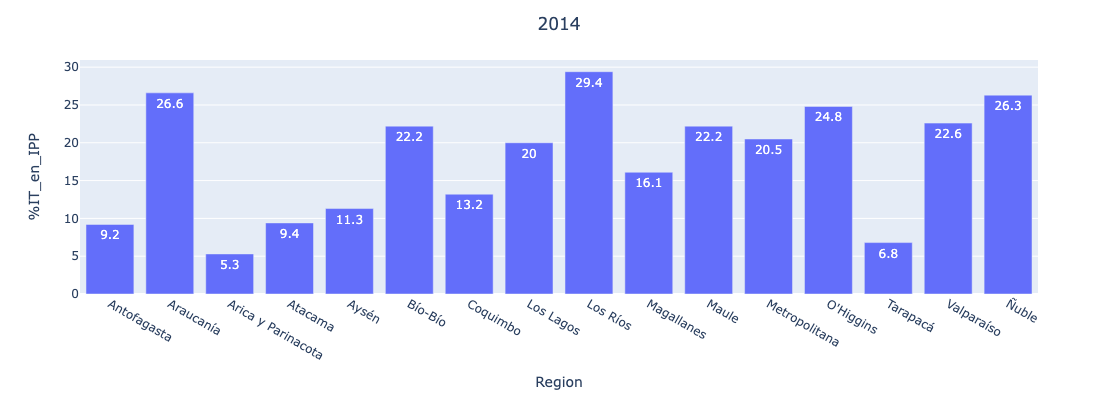

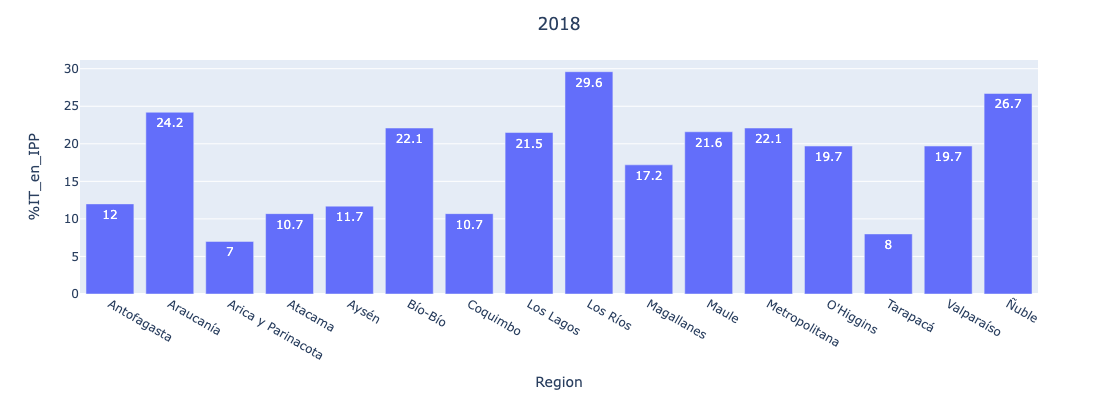

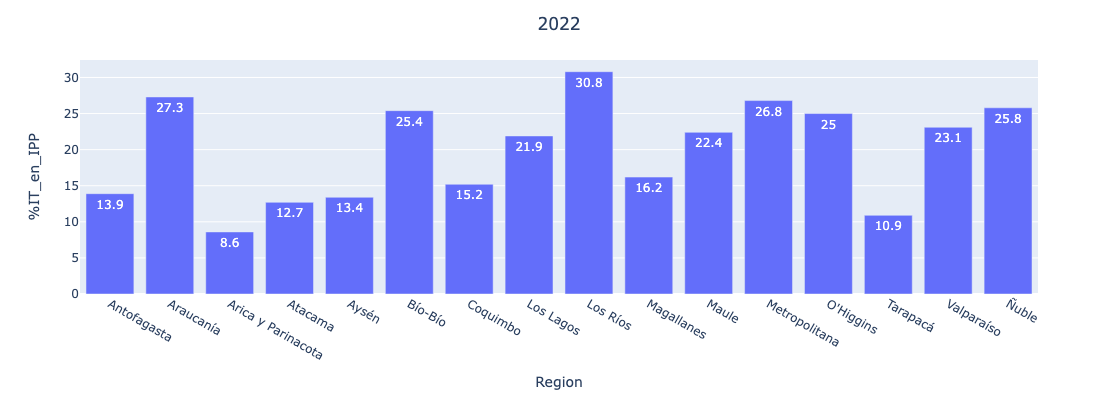

In [8]:
target = "%IT_en_IPP"
for year in [2014, 2018, 2022]:
    df_to_plot = df_group_region.loc[year].reset_index(drop=False)
    fig = px.bar(df_to_plot, x="Region", y= target, text_auto=True)
    fig.update_layout(title=dict(text=f"{year}", x=0.5, xanchor="center"),
                     height=400)
    fig.show()

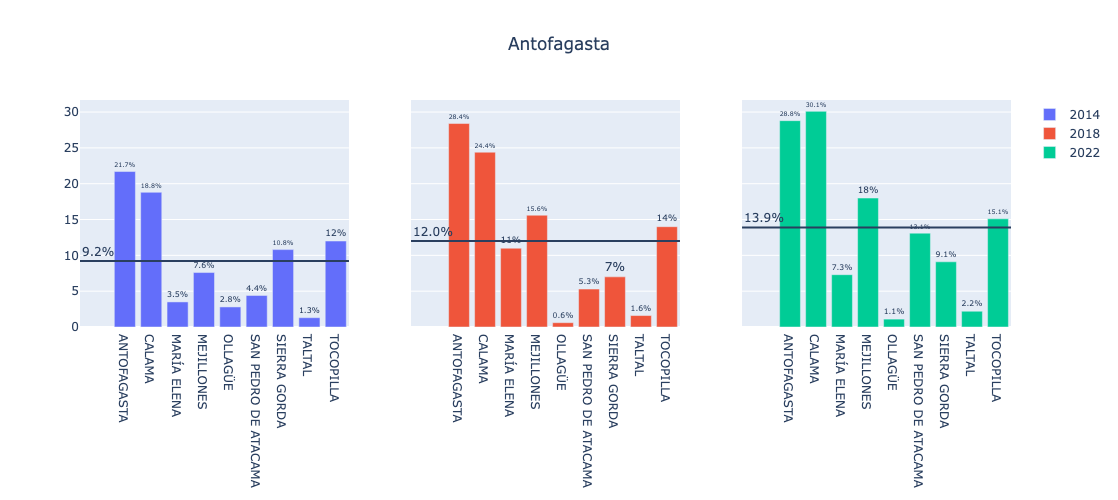

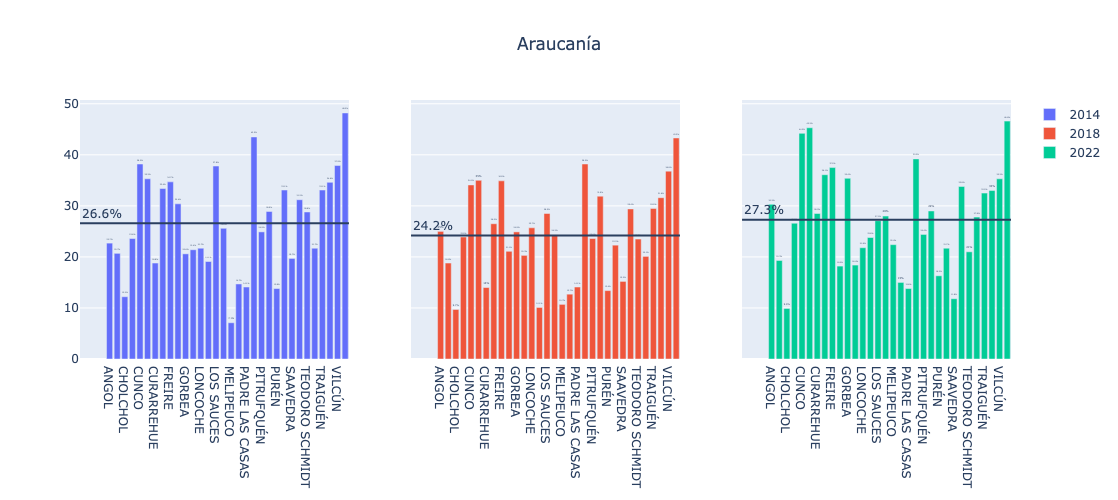

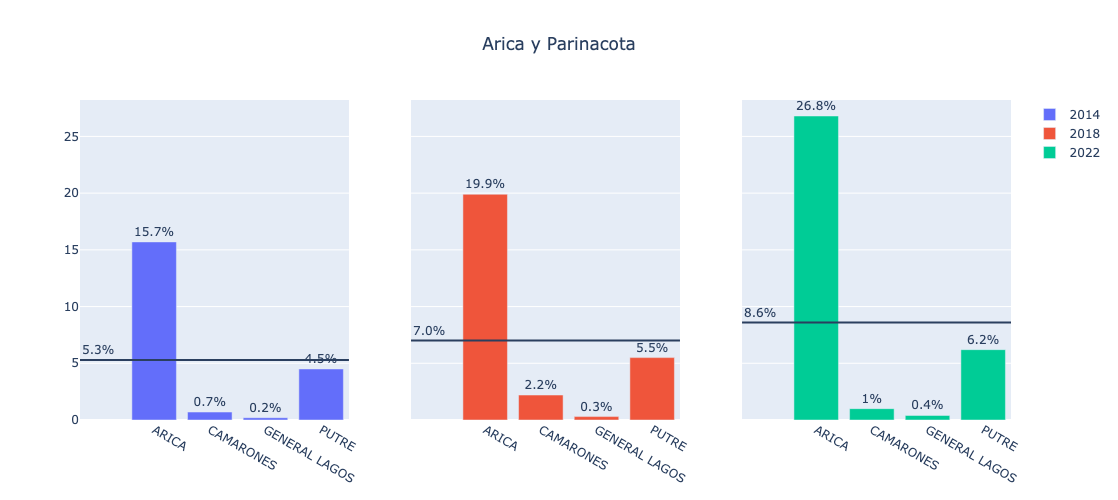

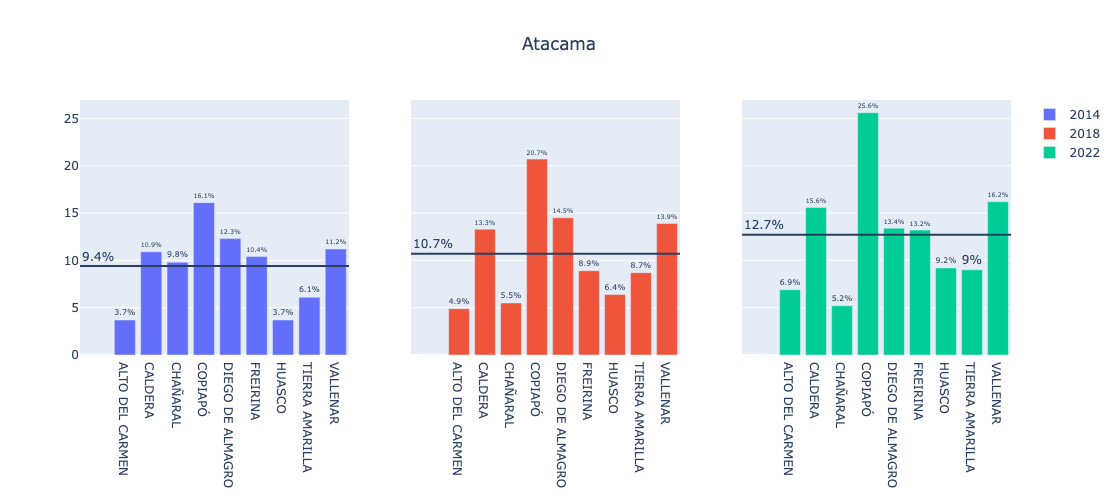

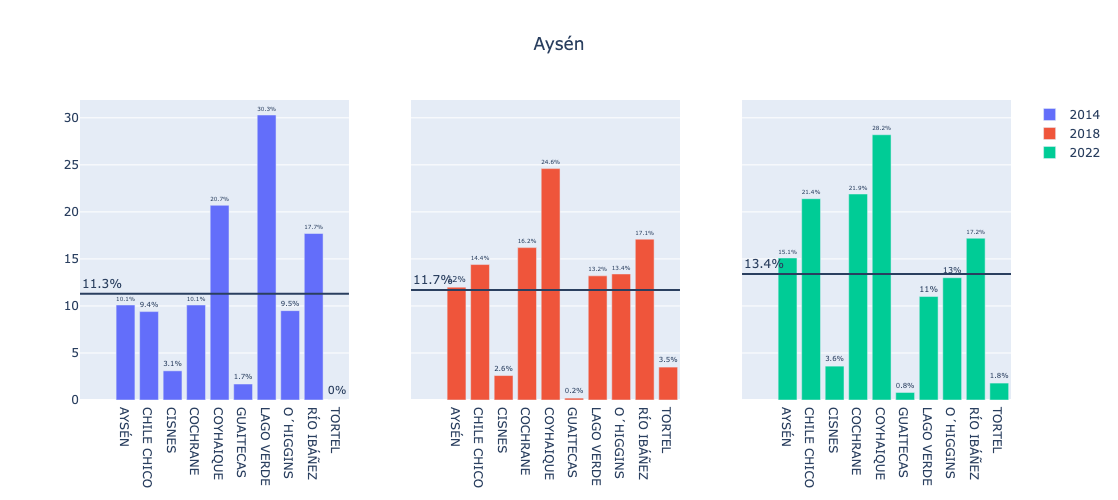

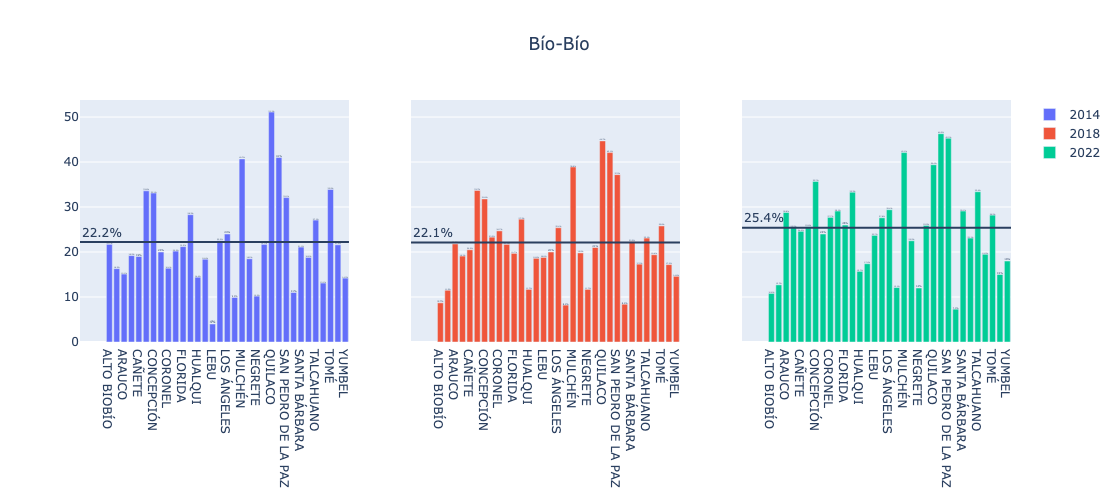

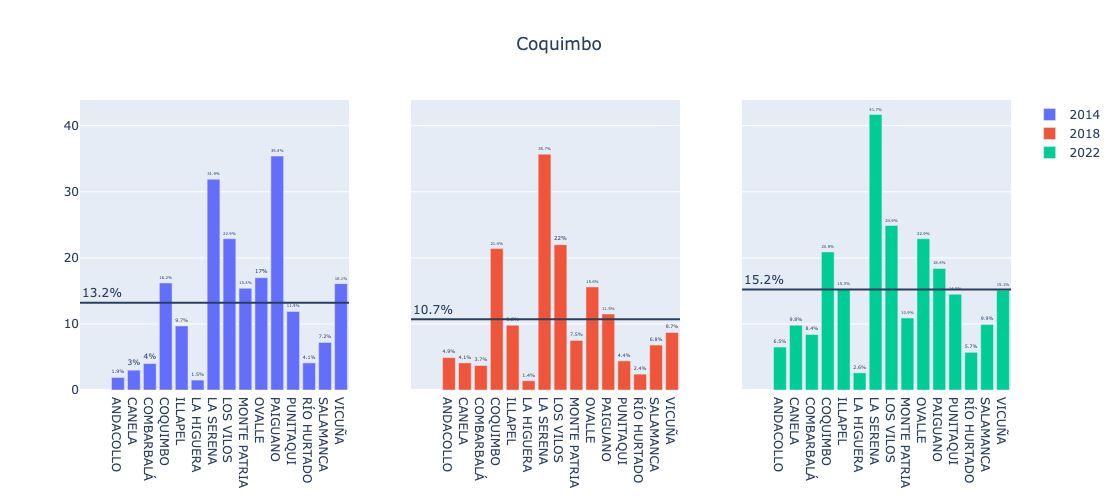

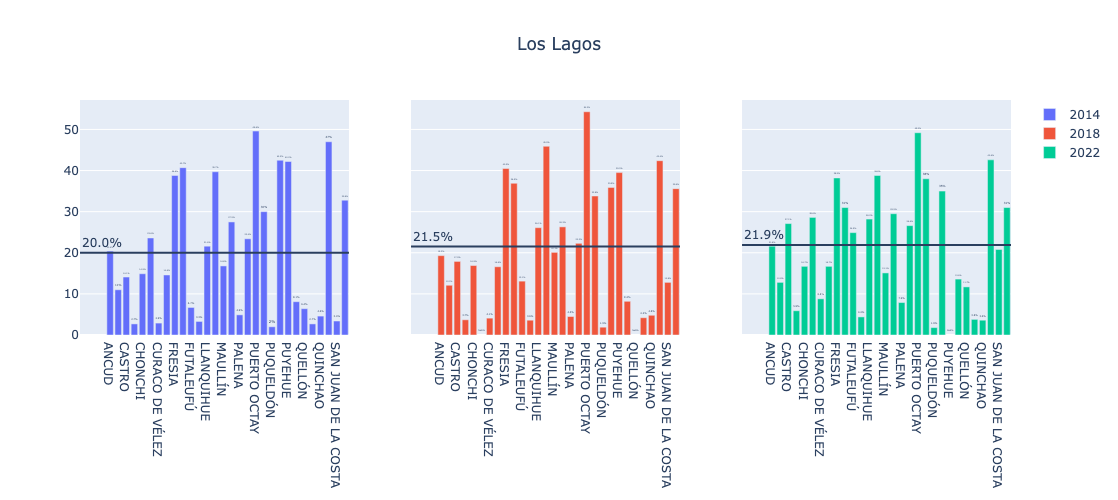

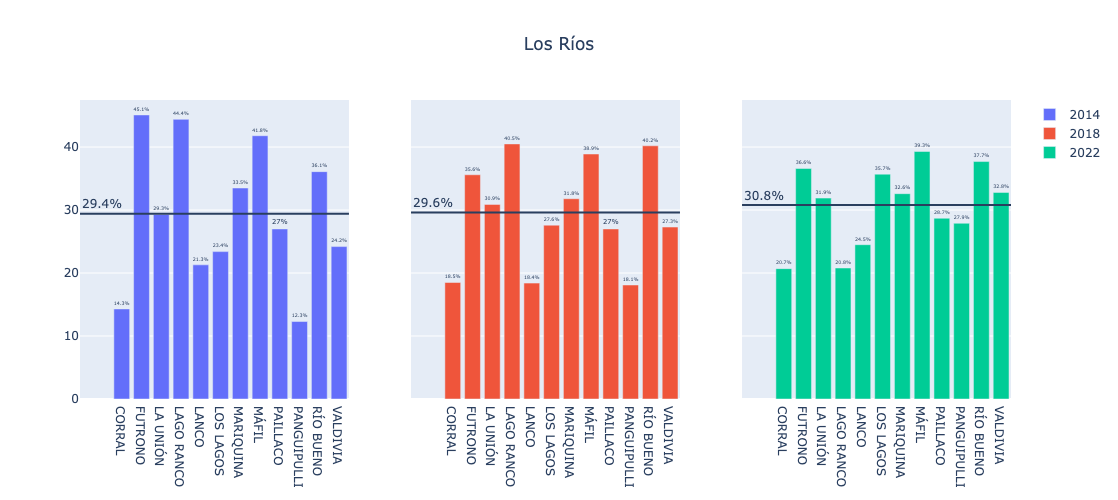

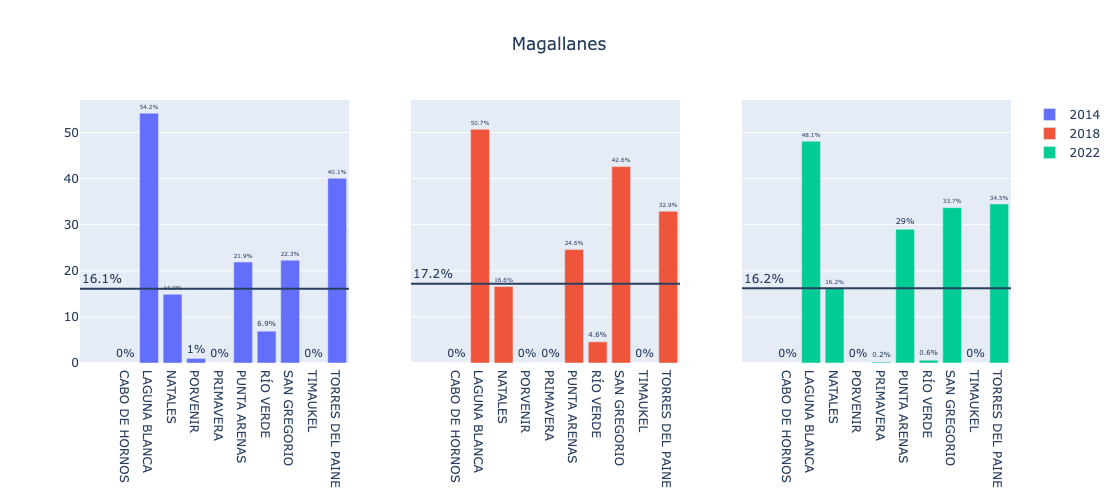

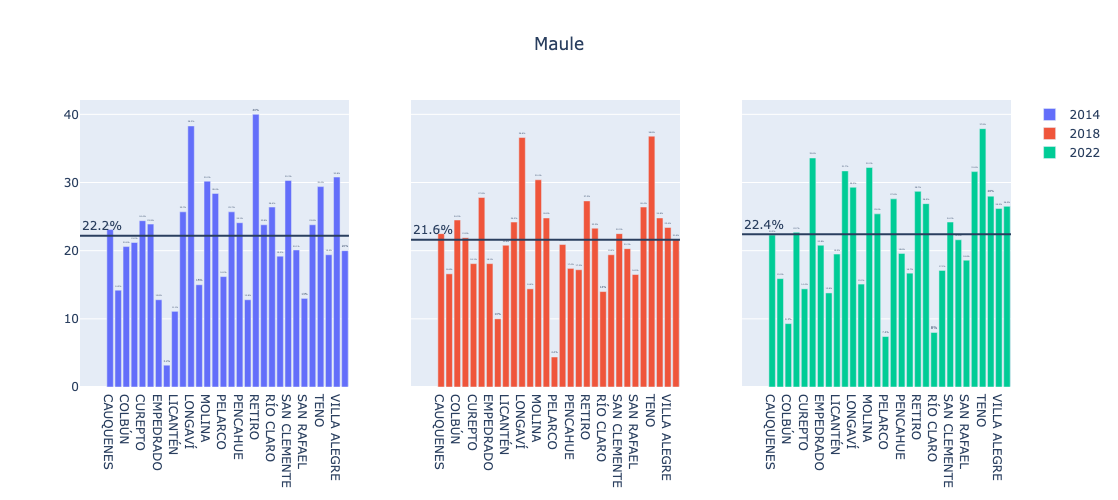

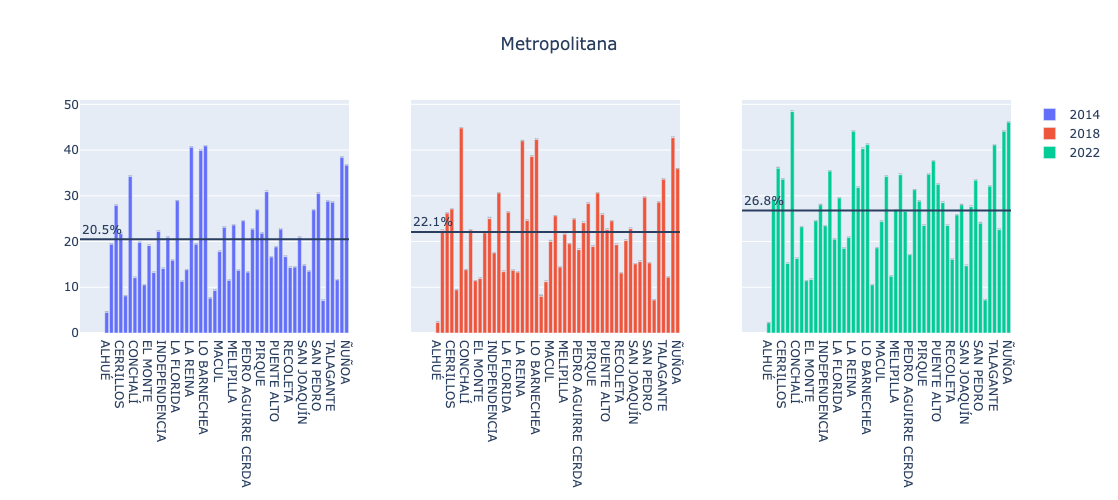

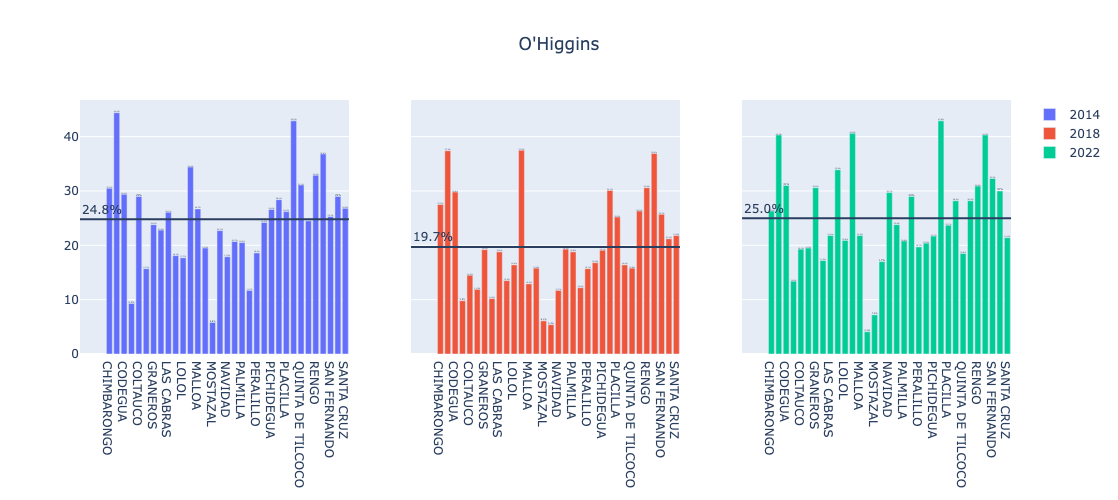

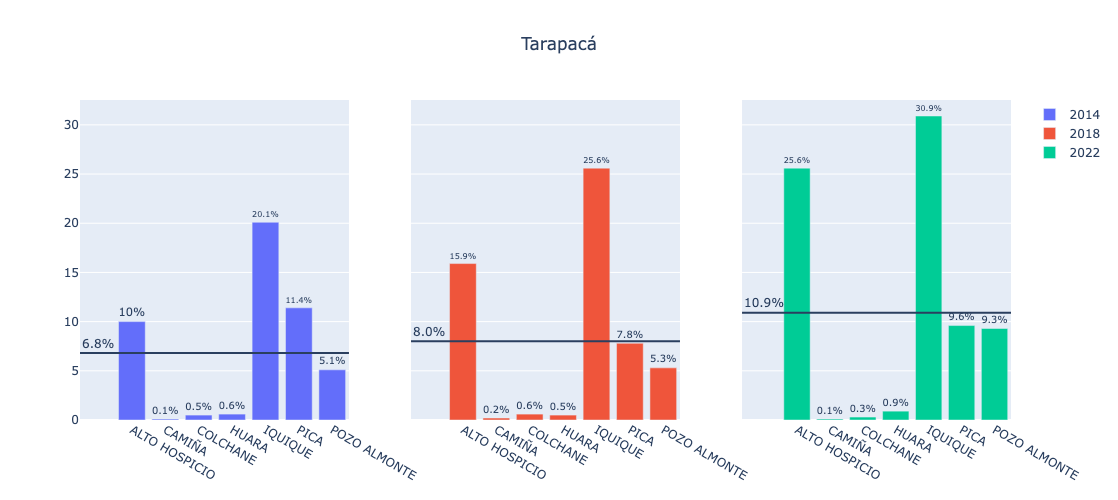

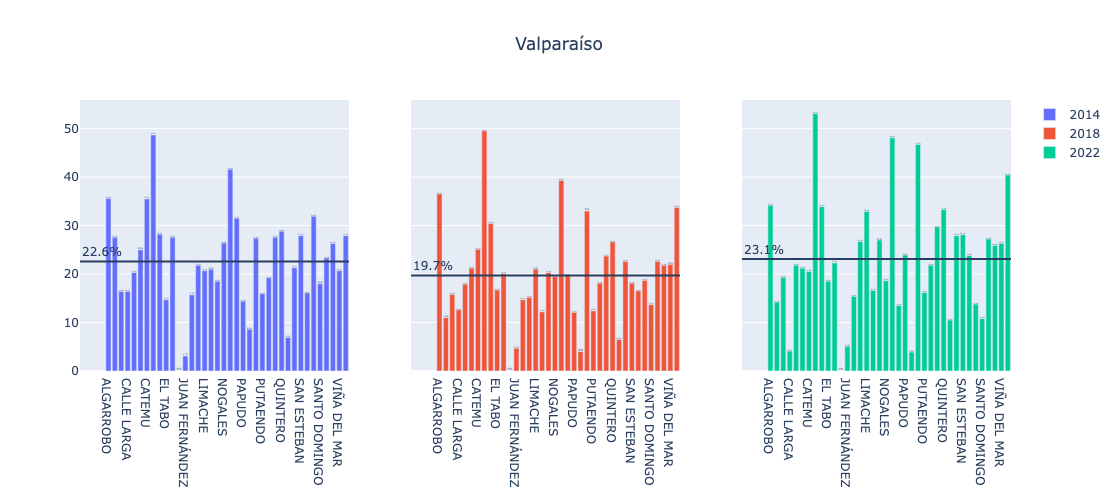

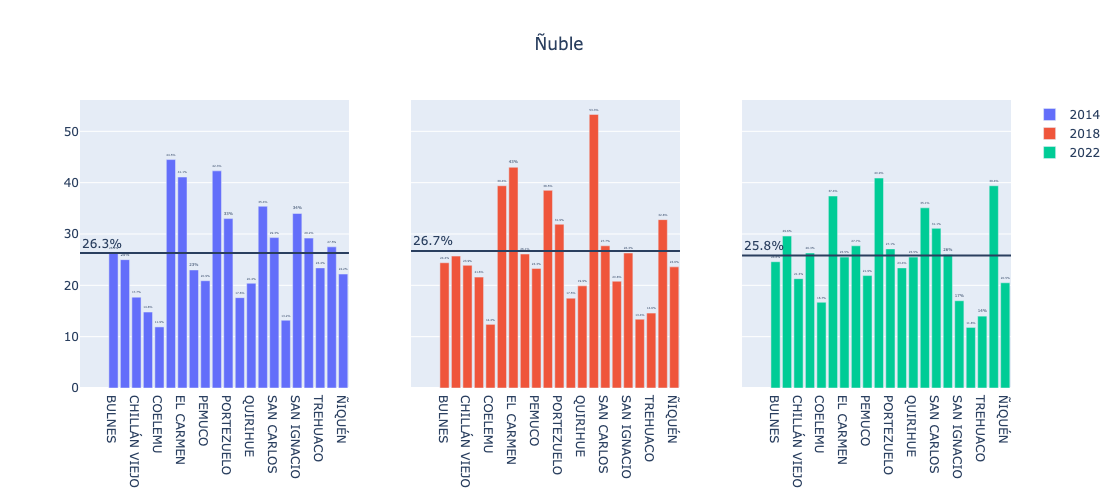

In [9]:
regions = df_group_comuna.reset_index()["Region"].unique()
years = [2014, 2018, 2022]
target = "%IT_en_IPP"
for region in regions: 
    fig = make_subplots(rows=1, cols=len(years), shared_yaxes=True)
    for i, year in enumerate(years):
        promedio_region = df_group_region.loc[(year, region)][target]
        fig.add_trace(go.Bar(name=f"{year}",
                             x=df_group_comuna.loc[(year, region)].reset_index()["Municipio"],
                             y=df_group_comuna.loc[(year, region)].reset_index()[target],
                             text=df_group_comuna.loc[(year, region)].reset_index()[target],
                             textposition="outside",
                             texttemplate="%{y}%"),
                     row=1, col=i+1)
        fig.add_hline(y=promedio_region, row=1, col=i+1)
        fig.add_annotation(x=-1, y=promedio_region,
            text=f"{promedio_region:.1f}%",
            showarrow=False,
            yshift=10, row=1, col=i+1)
        fig.update_layout(title=dict(text=f"{region}", x=0.5, xanchor="center"),
                         height=500)
    fig.show()

# Impuesto Territorial en Gastos Corrientes

In [ ]:
target = "%IT_en_GC"
for year in [2014, 2018, 2022]:
    df_to_plot = df_group_region.loc[year].reset_index(drop=False)
    fig = px.bar(df_to_plot, x="Region", y= target, text_auto=True)
    fig.update_layout(title=dict(text=f"{year}", x=0.5, xanchor="center"),
                     height=400)
    fig.show()

In [ ]:
regions = df_group_comuna.reset_index()["Region"].unique()
years = [2014, 2018, 2022]
target = "%IT_en_GC"
for region in regions: 
    fig = make_subplots(rows=1, cols=len(years), shared_yaxes=True)
    for i, year in enumerate(years):
        promedio_region = df_group_region.loc[(year, region)][target]
        fig.add_trace(go.Bar(name=f"{year}",
                             x=df_group_comuna.loc[(year, region)].reset_index()["Municipio"],
                             y=df_group_comuna.loc[(year, region)].reset_index()[target],
                             text=df_group_comuna.loc[(year, region)].reset_index()[target],
                             textposition="outside",
                             texttemplate="%{y}%"),
                     row=1, col=i+1)
        fig.add_hline(y=promedio_region, row=1, col=i+1)
        fig.add_annotation(x=-1, y=promedio_region,
            text=f"{promedio_region:.1f}%",
            showarrow=False,
            yshift=10, row=1, col=i+1)
        fig.update_layout(title=dict(text=f"{region}", x=0.5, xanchor="center"),
                         height=500)
    fig.show()